# Data Visualization
Pokemon Edition

## Welcome

With our fundamentals covered, we can now try playing around with dsta! But first we have to figure out where and how to get our data.

## Reading in Data

"Reading in Data" is basically a fancy way of saying converting data into an easy way for us to play around with. Luckily, this is such a common task that we can do it in one line. We'll just need to import some helper packages first :)

In [61]:
# Feel free to ignore this chunk of code. We are simply importing packages for us to use.
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # aesthetics
%config InlineBackend.figure_format = 'retina'

In the next line, we're reading in Pokemon data from a csv file. CSV stands for comma-separated values, and is an extremely common way to store data. If you ever go online and try to find some data to play around with, chances are you will download a csv file that contains that data.

So what does this line do then? Well, what we did here was convert our csv file into a __Dataframe__ object. The variable *data* is now a __Dataframe__ containing the data from *pokemon.csv*. We can think of a __Dataframe__ object as a table, and we'll now go through a bunch of different ways to access data from a table.

(Side note: how did we decide to put 'data/pokemon.csv' as the argument in pd.read_csv()? The answer is, we want to put the path to our csv file from the folder we are currently in. If you go to where this Jupyter file is stored on your computer, you will see a data folder right next to it, and pokemon.csv inside that data folder. If we had just put pokemon.csv right next to our Jupyter file, then we would only put 'pokemon.csv' as the argument. At this point you should be able to download any csv file online and convert it into a __Dataframe__!)

In [64]:
data = pd.read_csv('data/pokemon.csv')

In [68]:
print("Number of rows: ", len(data)) # len(Dataframe) displays the number of rows in a Dataframe
data.head(10) # data.head(n) displays the first n rows of a Dataframe (try seeing what data.tail(n) does!)

Number of rows:  800


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


## Matplotlib

Matplotlib is a python library that help us to plot data: the most basic plots are line, scatter and histogram plots.

- Line plots usually used when the x-axis is time
- Scatterplots are better when we want to check if there is correlation between two variables
- Histograms visualize the distribution of numerical data


Go ahead and run the block of code below. Right now the graph doesn't make much sense, but what could we do to visualize our data better?

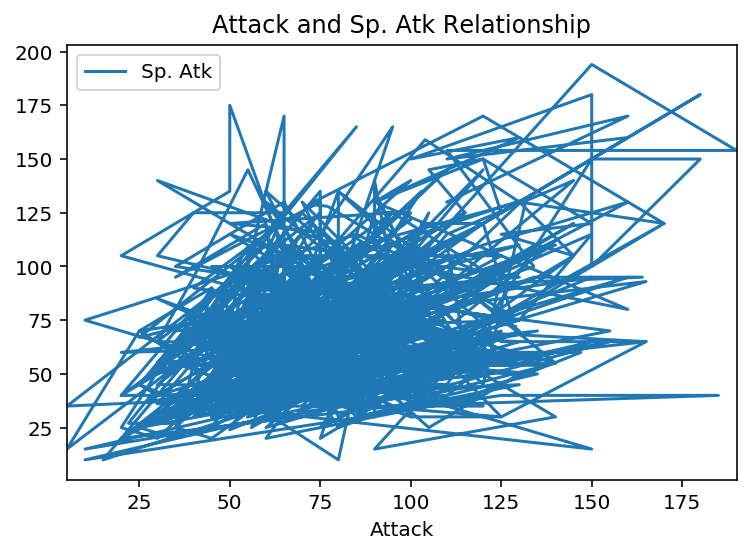

In [57]:
data.plot(x='Attack', # x axis
          y='Sp. Atk', # y axis
          kind='line') # type of graph (line, bar, hist, box, pie, scatter, and more!)
plt.title('Attack and Sp. Atk Relationship')
plt.show()

When you want to plot the frequency of something, leave the x axis blank and label the y axis the thing you want to count. Here, we are counting the frequency of Pokemon speeds, i.e. how many Pokemon have a speed between 0 and 25?

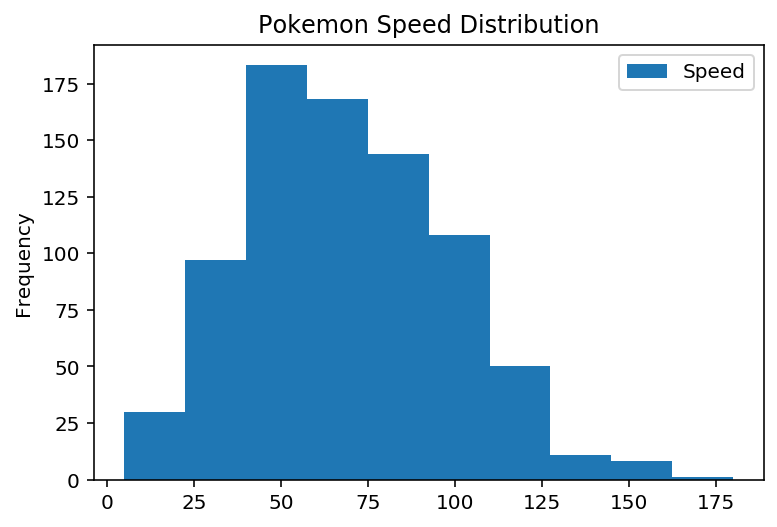

In [56]:
data.plot(y='Speed',
          kind='hist')
plt.title("Pokemon Speed Distribution")
plt.show()

## Working with Data

Let's say we want to play around with a single column. We can use data[COLUMN_NAME] to access that column as a list!

In [71]:
names = data["Name"] # names contains a list of all names
attacks = data["Attack"] # attacks contains a list of all attacks

for i in range(10):
    print(names[i] + "'s attack is " + str(attacks[i]))

Bulbasaur's attack is 49
Ivysaur's attack is 62
Venusaur's attack is 82
Mega Venusaur's attack is 100
Charmander's attack is 52
Charmeleon's attack is 64
Charizard's attack is 84
Mega Charizard X's attack is 130
Mega Charizard Y's attack is 104
Squirtle's attack is 48


We can also filter the data to, for example, show all the pokemon with more than 200 defense. We do this by checking if the defense of each row is greater than 200 and then only asking for the rows for which this is true. It turns out that there are only 3 pokemon like this! Feel free to change the condition to see what else you can discover :)

In [76]:
strong_defenders = data['Defense'] > 200
data[strong_defenders]

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,225,Mega Steelix,Steel,Ground,75,125,230,55,95,30,2,False
230,231,Shuckle,Bug,Rock,20,10,230,10,230,5,2,False
333,334,Mega Aggron,Steel,NaN,70,140,230,60,80,50,3,False


How might we get just the names of the strong defenders?

In [92]:
data[strong_defenders]["Name"]

224    Mega Steelix
230         Shuckle
333     Mega Aggron
Name: Name, dtype: object

## Data Analysis

Now we can analyze of the data on the pokemon—the easiest way to get an idea of how how data looks is to plot some of it and get a few facts about it. Luckily for us, it is really easy to get the following from our table:

- count: number of entries
- mean: the average numberr, over all pokemon
- std: standard deviation, measures how spread out the data is
- min: minimum entry
- 25%: first quantile (25% are below)
- 50%: median or second quantile (50% are below)
- 75%: third quantile (75% are below)
- max: maximum entry

In [13]:
data.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


From this overview, we can easily see the minimimum and maximum for each of these statistics. To visualize this, we often use a boxplot, which allows us to easily picture the average, spread and outliers. The green line in the middle is at the mean and the box shows the distance from the 25th to the 75th percentile.

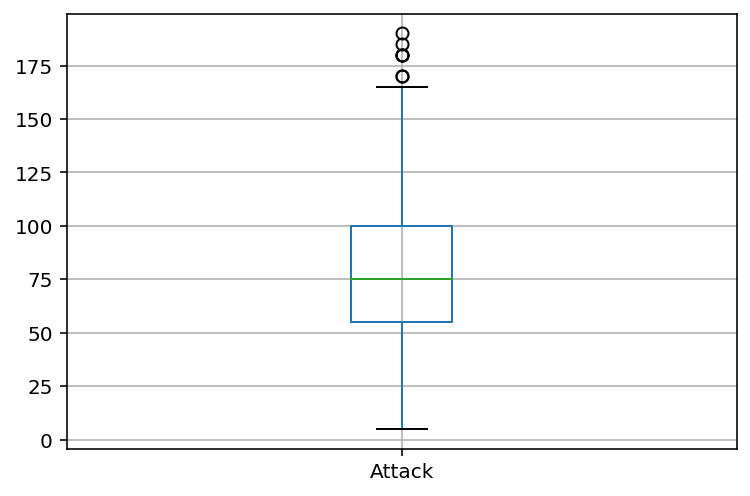

In [14]:
data.boxplot(
    column='Attack'
)
plt.show()

Notice that some of our pokemon are legendary while others are not. We might guess that the attack of legendary pokemon are greater than non-legendary pokemon. We could test our hypothesis by creating a boxplot for the attacks of each group. We can easily do this using the `by` keyword.

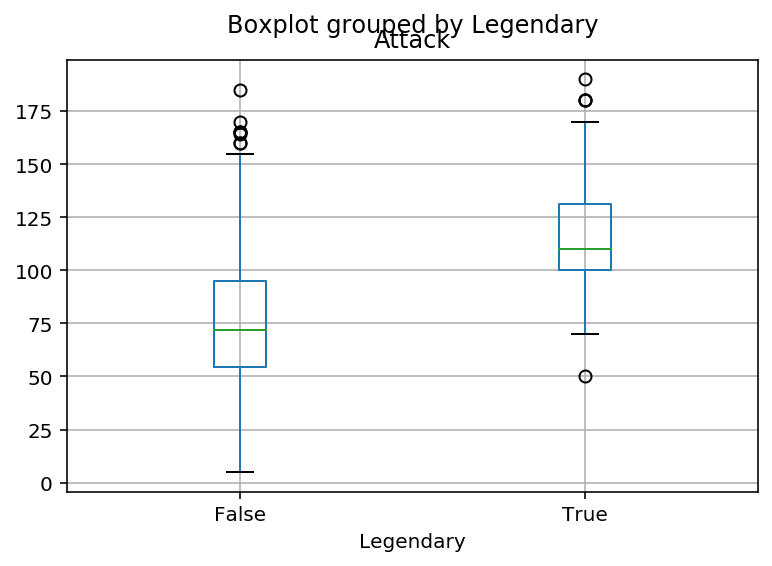

In [15]:
data.boxplot(
    column='Attack', # Column plotting
    by='Legendary' # Group
)
plt.show()

# More

Finally, there's a lot more interesting figures we can make using python. For example, when we plotted attack and defense they seemed to be linked or *correlated*.

In general, we can test how strongly two variables are correlated they are using the "Pearson product-moment correlation coefficient." This number will always be between +1 and -1. More extreme numbers (near $\pm1$) mean the correlation is strong, while numbers closer to zero indicate that the variables are less strongly linked.

We can visualize how all the variables are correlated by plotting these values in a heat map. The more strongly correlated values are more strongly colored. If you're curious about what some of the fancy abbreviations mean, try googling "seaborn heatmap." In general, google anything you don't know :)

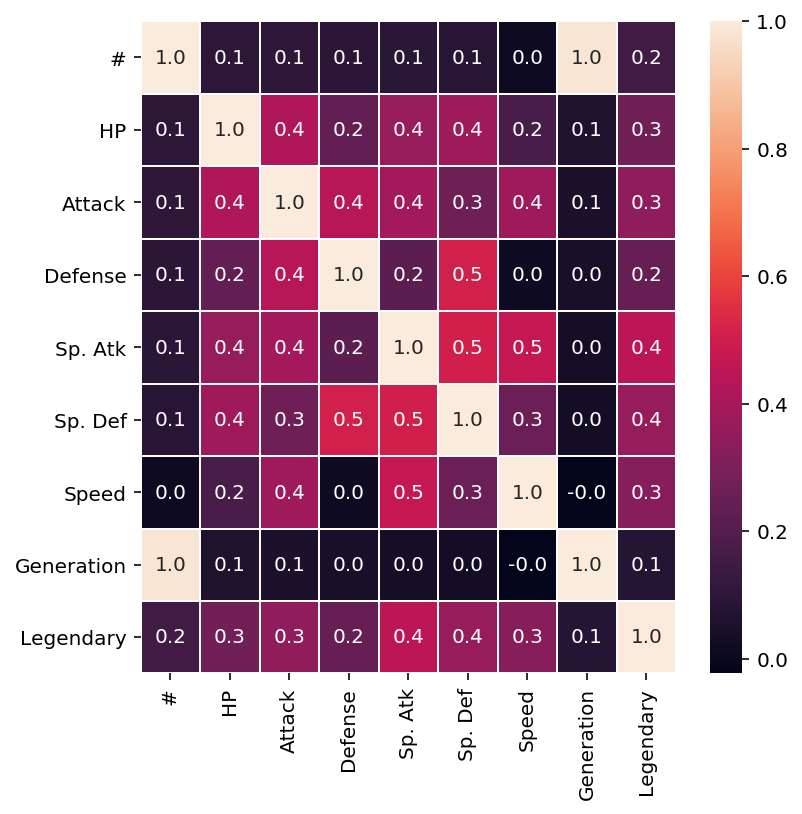

In [16]:
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(
    data.corr(),
    annot=True,
    linewidths=.5,
    fmt= '.1f',
    ax=ax
)
plt.show()

## Make your own Graphs!